In [150]:
# -*- coding: utf-8 -*-
#@author: Renan Silva
#@Github: https://github.com/rfelipesilva

#### Importing libraries

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

## IBGE areas analysis
This jupyter notebook was made to analyze the data from IBGE related to the municipalities from 2020 release, find more details in the ``data`` folder.

We'll focuses on:
1. Data cleaning
2. Getting information

    2.1 Count of municipalities by state with quick visualization.
        2.1.1 State with less municipalities
        2.1.2 State with more municipalities
        
    2.2 Area (km2) by state
        2.2.1 State with less km2
        2.2.2 State with more km2
        
3. Conclusion

________________________________________________________________________________

### Data cleaning
- Getting data -> shapefile with spatial information and xlsx with UF name
- Formatting data by UF
    - Count of municipalities
    - Area sum

#### First file
This file basically will provide almost everything that we need, so there is no much work on this. We are going to verify how many null records do we have by column.

In [7]:
data_shape = gpd.read_file('../data/shapefile/BR_Municipios_2020.shp') #reading shapefile
data_shape.head(3)                                                     #visualization for the first 3 lines of shapefile

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3..."


In [12]:
data_shape.isnull().sum() #checking how many null values per column

CD_MUN      0
NM_MUN      0
SIGLA_UF    0
AREA_KM2    0
geometry    0
dtype: int64

Nice! No Null values for any record.

#### Second file
Basically what we need from this file is the UF name, that is placed in the **NM_UF**, and we will also check if there are null values that may disturb our analysis and handle with that. The file is related to all municipalities from Brazil but, here we only need the 27 UF and Name from each state. 

In [13]:
data_xlsx = pd.read_excel('../data/xlsx/AR_BR_RG_UF_RGINT_RGIM_MES_MIC_MUN_2020.xls', sheet_name='AR_BR_MUN_2020') #reading excel file
data_xlsx.head(3) #checking the first 3 lines

,ID,CD_GCUF,NM_UF,NM_UF_SIGLA,CD_GCMUN,NM_MUN_2020,AR_MUN_2020
0,1.0,11.0,Rondônia,RO,1100015.0,ALTA FLORESTA D'OESTE,7067.127
1,2.0,11.0,Rondônia,RO,1100023.0,ARIQUEMES,4426.571
2,3.0,11.0,Rondônia,RO,1100031.0,CABIXI,1314.352


In [5]:
data_xlsx.shape #number of rows(municipalities) and columns respectively

(5575, 7)

We can see that we have **5575** municipalities, according to the file.

In [16]:
data_xlsx.isnull().sum() #checking how many null values per column

ID             3
CD_GCUF        3
NM_UF          3
NM_UF_SIGLA    3
CD_GCMUN       3
NM_MUN_2020    3
AR_MUN_2020    2
dtype: int64

Hmmm, within this file we found that some records are with missing values, we need to clean that...

In [19]:
data_xlsx_with_no_null = data_xlsx[['NM_UF','NM_UF_SIGLA']].dropna() #cleaning the Null values based on two specific columns with dropna() function
data_xlsx_with_no_null.isnull().sum()

NM_UF          0
NM_UF_SIGLA    0
dtype: int64

As we only need the states, we also filtered a few columns to work with. Here is what we got:

In [21]:
data_xlsx_with_no_null.head(3)

,NM_UF,NM_UF_SIGLA
0,Rondônia,RO
1,Rondônia,RO
2,Rondônia,RO


As we can see, there are some duplicate records since we are working with state information, it is time do clean up the duplicate records and get a clean dataframe!

In [34]:
data_xlsx_uf_unique = data_xlsx_with_no_null.drop_duplicates() #cleaning the duplicate records since we only need the 27 states
data_xlsx_uf_unique.reset_index(drop=True)

,NM_UF,NM_UF_SIGLA
0,Rondônia,RO
1,Acre,AC
2,Amazonas,AM
3,Roraima,RR
4,Pará,PA
5,Amapá,AP
6,Tocantins,TO
7,Maranhão,MA
8,Piauí,PI
9,Ceará,CE


In [35]:
data_xlsx_uf_unique.shape #number of rows(states) and columns respectively

(27, 2)

Good, now we can go ahead and merge the information to get the state name for each municipality.

#### Merging UF name to each municipality

In [38]:
data = pd.merge(data_shape, data_xlsx_uf_unique, left_on='SIGLA_UF', right_on='NM_UF_SIGLA') #merge both files giving priority for the data_shape file with all municipalities.
data.head(3) #checking the first 3 rows

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,NM_UF,NM_UF_SIGLA
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8...",Rondônia,RO
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736...",Rondônia,RO
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3...",Rondônia,RO


No we have duplicated columns, NM_UF_SIGLA and SIGLA_UF contains the same information. Let's delete the column **NM_UF_SIGLA**.

In [40]:
data.drop('NM_UF_SIGLA', axis=1, inplace=True) #deleting the column 'NM_UF_SIGLA' because we already have this information.
data.head(3) #checking the first 3 rows

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,NM_UF
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8...",Rondônia
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736...",Rondônia
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3...",Rondônia


In [41]:
data.shape #number of rows(municipalities) and columns respectively

(5570, 6)

Quite simple to merge files, right? As a challenge, I challenge you to put everything within a function, it will be a good improvement for the analysis.

#### Visualizing the shapefile

Did you know that? Can you imagine that Brazil contains 5570 municipalities? Let's try to visualize that.

<AxesSubplot:>

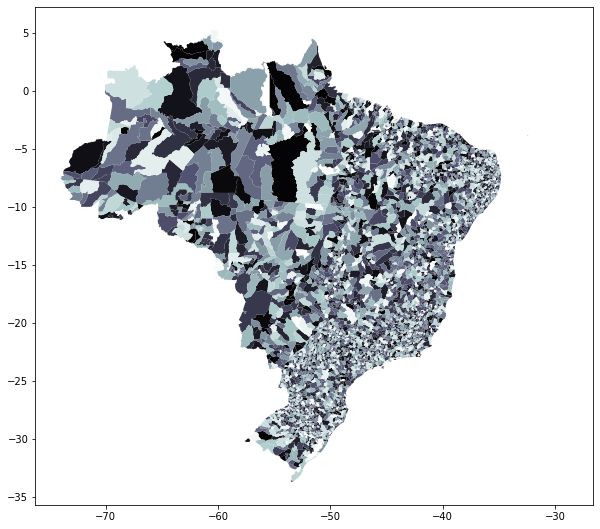

In [12]:
data.plot(column='NM_MUN' ,figsize=(10,10), cmap='bone')

Wow! Nice visualization but actually it's not really telling us anything. Let's increase one level in the areas for Brazil, for this case, it will be States.

_________________________________________________________

### Getting information
While answering the questions, we will format the file to later plot. For this task we'll dissolve the polygons by state thus we got only 27 polygons (representing the states) and a better visualization.

Here we'll create a new dataframe for each state and not for municipalities anymore, then, facilitate the visualization later. To do that, we are going to use a aggregation method with the function: ``Dissolve``, basically it will "group" the municipalities by state and create a "new" shapefile according with the grouped data, for more details check the documentation here: [Dissolve documentation](https://geopandas.org/docs/user_guide/aggregation_with_dissolve.html).

**Important note**: the bigger your data, more time the spatial analysis with take to finish, in this case we are handling with a huge data since Brazil is quite large, so be a little patient, I promisse in the end it will worth it.

In [45]:
data.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,NM_UF
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8...",Rondônia
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736...",Rondônia
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3...",Rondônia
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.00080 -11.29737, -61.00103 -11.3...",Rondônia
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-61.49976 -13.00525, -61.49809 -13.0...",Rondônia


In [46]:
data_to_dissolve = data[['SIGLA_UF', 'NM_UF', 'NM_MUN', 'geometry']] #data to solve the polygons by state
data_uf = data_to_dissolve.dissolve(by='SIGLA_UF') #solving the polygons by state

In [47]:
data_uf.head(3)

,geometry,NM_UF,NM_MUN
SIGLA_UF,,,
AC,"POLYGON ((-68.38821 -11.04058, -68.38874 -11.0...",Acre,Acrelândia
AL,"MULTIPOLYGON (((-35.75791 -9.69285, -35.75801 ...",Alagoas,Água Branca
AM,"POLYGON ((-58.14737 -7.34324, -58.14221 -7.349...",Amazonas,Alvarães


In [48]:
data_uf.shape

(27, 3)

Now we can see clearly each state and also the number of states is correct.
Let's visualize the data as we did for the municipalities in the first visualization.

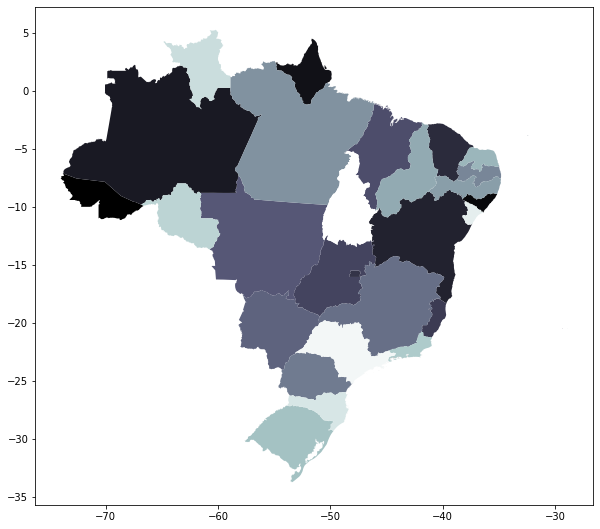

In [51]:
data_uf.plot(column='NM_UF', figsize=(10,10), cmap='bone') #ploting the data with colors based on NM_UF column(state), also, cmap parameter to choose the color pallete.
plt.show()

#### Count municipalities by state

What if we get a visualization for municipalities by state?

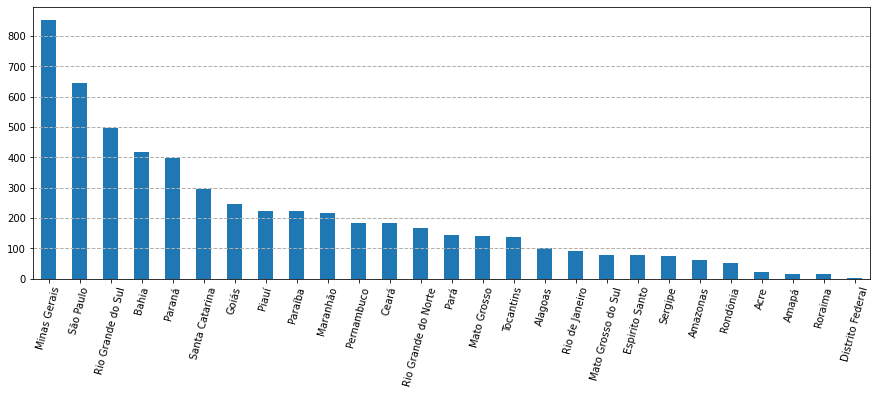

In [136]:
data['NM_UF'].value_counts().plot(kind='bar', figsize=(15,5), rot=75).grid(axis='y', linestyle='--', linewidth=1) #count of municipalities by state
plt.show()

Here we already got the answer of what state has more and less municipalities but, if we want a specific information we can do the following:

In [101]:
state_with_less_municipality = data['NM_UF'].value_counts().sort_values().head(1)
state_with_more_municipality = data['NM_UF'].value_counts().sort_values(ascending=False).head(1)

In [102]:
print('The state {} is the one with less municipalities amount with: {}'.format(state_with_less_municipality.index[0],
                                                                               state_with_less_municipality.values[0]))
print('The state {} is the one with more municipalitites amount with: {}'.format(state_with_more_municipality.index[0],
                                                                                state_with_more_municipality.values[0]))

The state Distrito Federal is the one with less municipalities amount with: 1
The state Minas Gerais is the one with more municipalitites amount with: 853


The target now is to use a heatmap visualization to easily identify the state with **less** and **more**, to do that, we need to get the count by municipality(quite similar function but now we are going to use the ``groupby`` funcion with count() aggregation:

In [115]:
count_municipality_by_state = data.groupby('NM_UF')['CD_MUN'].count()

Also, we are going to use the ``data_uf`` (the one dissolved by state) merging with the ``count_municipality_by_state`` through **NM_UF** attribute.

In [118]:
data_mun = pd.merge(data_uf, count_municipality_by_state, left_on='NM_UF', right_on='NM_UF') #merging information

#### Visualizing the municipalities presence by state

Let's visualize the count of municipalities by state with the data merged in the prior command:

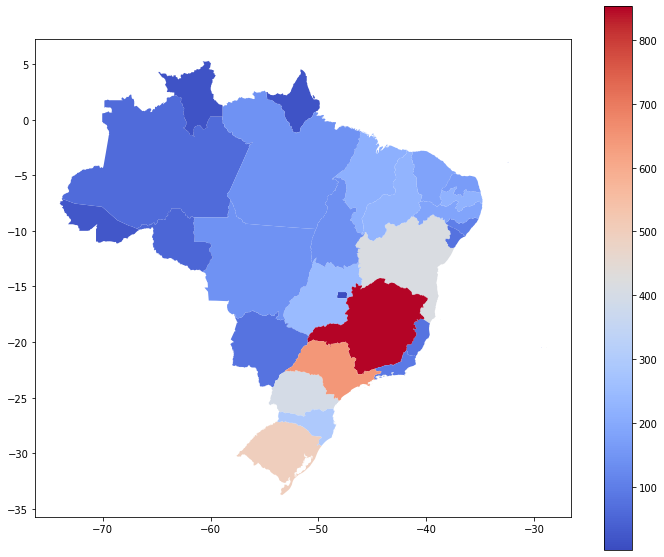

In [146]:
data_mun.plot(column='CD_MUN', figsize=(12,10), legend=True, cmap='coolwarm')
plt.show()

We can now visualize where we have more municipalities, on this case, the state of Minas Gerais is the one with more municipalitites.

#### Area (km2) by state

Back to the data_uf file, we can now analysis the area km2, this will provide the sum of area by state:

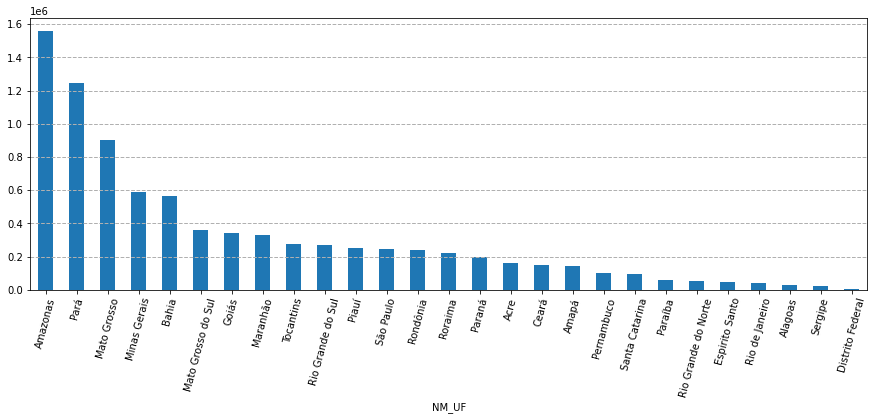

In [141]:
data.groupby('NM_UF')['AREA_KM2'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15,5), rot=75).grid(axis='y', linestyle='--', linewidth=1)
plt.show()

Here we also got the answer of what state has more and less area coverage but, if we want a specific information we can do the following:

In [142]:
state_with_less_area = data.groupby('NM_UF')['AREA_KM2'].sum().sort_values(ascending=True).head(1)
state_with_more_area = data.groupby('NM_UF')['AREA_KM2'].sum().sort_values(ascending=False).head(1)

In [143]:
print('The state {} is the one with less area coverage with: {}'.format(state_with_less_area.index[0],
                                                                        state_with_less_area.values[0]))
print('The state {} is the one with more area coverage with: {}'.format(state_with_more_area.index[0],
                                                                        state_with_more_area.values[0]))

The state Distrito Federal is the one with less area coverage with: 5760.784
The state Amazonas is the one with more area coverage with: 1559167.8779999998


In [144]:
area_coverage_sum_by_state = data.groupby('NM_UF')['AREA_KM2'].sum()

In [145]:
data_uf = pd.merge(data_uf, area_coverage_sum_by_state, left_on='NM_UF', right_on='NM_UF') #merging information to plot

#### Visualizing the area coverage by state
Let's visualize as we did for the count of municipalities but now with the km2:

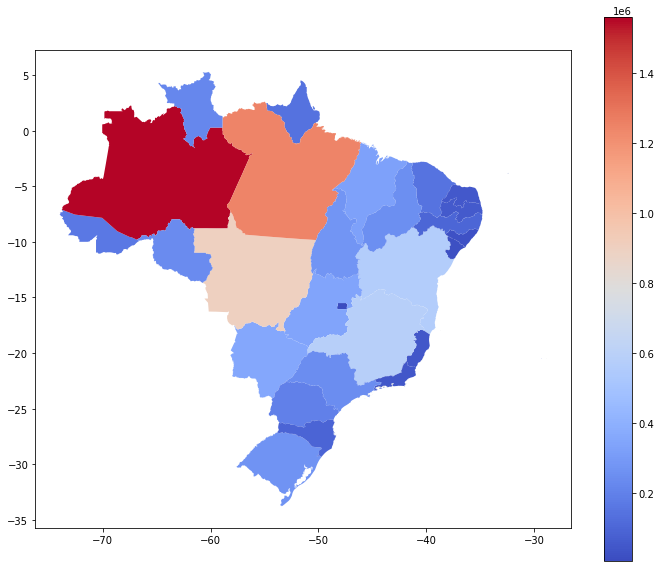

In [147]:
data_uf.plot(column='AREA_KM2', figsize=(12,10), legend=True, cmap='coolwarm')
plt.show()

### Conclusion
First of all, thanks for reading this far! 

It was a pleasure to be with you, it is interesting to see that one of the largest states in Brazil is actually one with the fewest municipalities, so we can imagine how big Brazil is, right?

Last but not least, have you liked the analysis? To be was quite a surprised Minas Gerais is the state with more municipalities, can you imagine why? I challenge you to explore that.

If you would like to explore and perhaps improve the analysis, here is some of the ideas I have in mind:

#### Next steps
- Folium -> to put a nice background map in the visualization
- Interactive map -> Maybe streamlit, just thinking loud.